### Importing necessary libraries and dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import collections

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv(r"C:\Users\Shivu\Downloads\CSV Files\bankmarketing.csv")

### A Glimpse of the dataset

In [5]:
pd.set_option('display.max_columns',None)
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7841,47,self-employed,divorced,professional.course,unknown,yes,no,telephone,jun,mon,364,13,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
27000,42,technician,married,professional.course,no,no,no,cellular,nov,fri,21,6,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
13896,37,blue-collar,married,basic.9y,unknown,yes,no,cellular,jul,fri,216,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
6415,40,services,single,high.school,unknown,no,no,telephone,may,wed,189,7,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23807,38,admin.,married,university.degree,no,yes,yes,cellular,aug,fri,62,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no


In [6]:
print("Number of rows: {} \nNumber of Columns: {}".format(df.shape[0],df.shape[1]))

Number of rows: 41188 
Number of Columns: 21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe(include = ['object']).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [9]:
df.describe(include = ['float64','int64']).T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Observations

__1. This is a binary classification problem where we need to classify whether a person contacted through a marketing campaign will say yes or no.__
__2. There are  total of 20 features and 1 target variable(y), out of which 10 are categorical and 10 are numerical variables.__

### Splitting into Features and target variables and also into train and test data

In [11]:
X = df.drop('y', axis = 1)
y = pd.DataFrame(df['y'], columns = ['y'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43) 

### Class Distribution

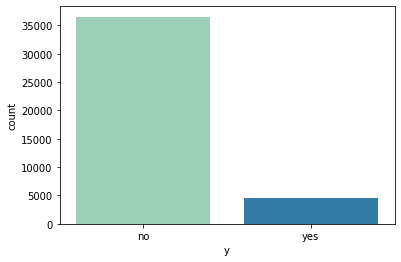

In [13]:
sns.countplot(df['y'], palette = "YlGnBu")

In [14]:
print("Percentage of yes : {}".format(round(100*(len(df[df['y']=='yes'])/df.shape[0]),2)))
print("Percentage of no : {}".format(round(100*(len(df[df['y']=='no'])/df.shape[0]),2)))

Percentage of yes : 11.27
Percentage of no : 88.73


__This is a imbalance classification problem and Random Under Sampling technique is used to deal with this problem.__

### Creating Dummy Variables

In [15]:
dummy_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' and X_train[col].nunique() > 3]
X_train = pd.get_dummies(X_train, columns = dummy_cols, drop_first = False)
X_test = pd.get_dummies(X_test, columns = dummy_cols, drop_first = False)

### Label Encoding

In [16]:
encoder_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' and X_train[col].nunique() <= 3]
encoder =LabelEncoder()

In [17]:
encoder_cols

['default', 'housing', 'loan', 'contact', 'poutcome']

In [18]:
for col in encoder_cols:
    print(df[col].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


In [19]:
for col in encoder_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [20]:
y_train['y'] = encoder.fit_transform(y_train['y'])

y_test['y'] = encoder.fit_transform(y_test['y'])

### Scaling

In [21]:
X_train_cols = X_train.columns
X_test_cols = X_test.columns
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train_cols)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test_cols)

In [22]:
all_data_test= pd.merge(X_test, y_test, how = 'inner', on = X_test.index)
all_data_train = pd.merge(X_train, y_train, how = 'inner', on = X_train.index)
all_data_test.drop('key_0', axis =1, inplace = True)
all_data_train.drop('key_0', axis =1, inplace = True)
all_data = pd.concat([all_data_train, all_data_test])

In [23]:
all_data

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y
0,1.133333,1.0,-1.0,0.0,1.0,-0.379630,-0.5,0.0,0.0,0.0,0.00000,0.266594,0.857143,0.000829,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.466667,0.0,0.0,0.0,0.0,-0.740741,10.5,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.029030,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.800000,0.0,0.0,0.0,1.0,-0.277778,-0.5,0.0,0.0,0.0,0.09375,0.779108,0.000000,0.027924,0.287597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,-0.266667,0.0,-1.0,0.0,1.0,-0.106481,0.5,0.0,0.0,0.0,0.09375,0.779108,0.000000,0.001935,0.287597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.333333,0.0,-1.0,0.0,0.0,-0.800926,2.5,0.0,0.0,0.0,-0.90625,-0.931447,-0.698413,-0.988665,-0.712403,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13588,0.600000,0.0,-1.0,0.0,0.0,-0.583333,1.0,0.0,1.0,-1.0,-0.90625,-0.931447,-0.698413,-0.998894,-0.712403,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
13589,0.200000,1.0,-1.0,0.0,1.0,-0.217593,0.0,0.0,0.0,0.0,0.09375,0.779108,0.000000,0.001935,0.287597,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
13590,0.600000,1.0,0.0,0.0,0.0,0.314815,1.0,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.027647,0.287597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
13591,-1.000000,1.0,-1.0,0.0,0.0,5.990741,2.0,0.0,0.0,0.0,0.09375,0.183896,-0.142857,0.027647,0.287597,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


### Random Under Sampling

In [24]:
# Shuffling the data
all_data = all_data.sample(frac=1)

yes_df = all_data.loc[all_data['y']==1]
no_df = all_data.loc[all_data['y']==0][:len(yes_df)]

In [25]:
balanced_df = pd.concat([yes_df,no_df])

new_df = balanced_df.sample(frac=1, random_state = 43)

new_df.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,y
18070,-0.133333,0.0,0.0,0.0,0.0,0.578704,-0.5,-996.0,1.0,1.0,-0.68750,0.927095,-1.222222,-1.057506,-1.762791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
6855,0.733333,1.0,-1.0,2.0,0.0,0.810185,-0.5,0.0,0.0,0.0,-0.90625,-0.931447,-0.698413,-0.985900,-0.712403,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
9554,0.533333,0.0,0.0,2.0,0.0,2.939815,-0.5,0.0,0.0,0.0,-0.37500,-0.597388,-0.031746,-0.203760,0.037209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16354,0.866667,0.0,0.0,0.0,0.0,1.527778,-0.5,0.0,0.0,0.0,-1.25000,-0.855277,0.158730,-0.992259,-0.889922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
19919,-0.333333,0.0,-1.0,0.0,0.0,0.143519,-0.5,0.0,0.0,0.0,0.09375,-0.331882,0.904762,0.029306,0.287597,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


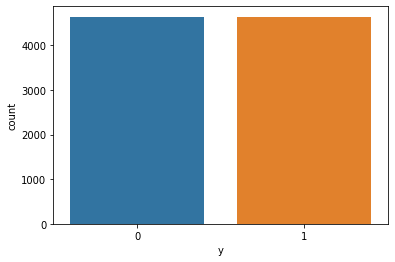

In [26]:
sns.countplot(x = 'y', data = new_df)

### Dimensionality Reduction using PCA

In [27]:
X = new_df.drop('y', axis = 1)
y = new_df['y']

X_reduced_PCA = PCA(n_components = 2, random_state = 43).fit_transform(X.values)

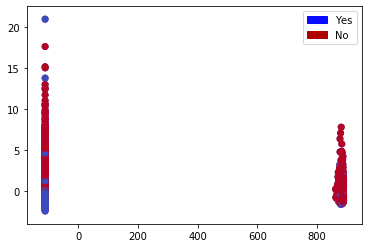

In [28]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='Yes')
red_patch = mpatches.Patch(color='#AF0000', label='No')

plt.scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1], c=(y==0), label = 'No', cmap = 'coolwarm')
plt.scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1], c=(y==1), label = 'Yes', cmap = 'coolwarm')
plt.legend(handles = [blue_patch, red_patch])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [30]:
# Turning into arrays for feeding into classifiers
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [31]:
classifiers = {'Logistic Regression': LogisticRegression(),
              'Knearest': KNeighborsClassifier(),
              'Support Vector Classifier': SVC(),
              'Decision Tree Classifier': DecisionTreeClassifier()}

In [32]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print(classifier.__class__.__name__," has a training score of ", round(training_score.mean(),2)*100," % accuracy score.")

LogisticRegression  has a training score of  87.0  % accuracy score.
KNeighborsClassifier  has a training score of  86.0  % accuracy score.
SVC  has a training score of  60.0  % accuracy score.
DecisionTreeClassifier  has a training score of  84.0  % accuracy score.


### GridSearchCV Using Logistic Regression

In [33]:
log_reg_params = {'penalty':['l1','l2'], 'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

In [34]:
log_reg

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
grid_log_reg.best_score_

0.8718390804597702

### GridSearchCV Using KnearestNeighbors

In [36]:
knears_params = {'n_neighbors':list(range(2,10,1)), 'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears = grid_knears.best_estimator_

In [37]:
knears

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [38]:
grid_knears.best_score_

0.866522988505747

### GridSearchCV Using Support Vector Classifier

In [39]:
svc_params = {'C':[0.5,0.7,0.9,1], 'kernel':['rbf','poly','sigmoid','linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

In [40]:
svc

SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
grid_svc.best_score_

0.8774425287356321

### GridSearchCV Using Decision Tree Classifer

In [42]:
tree_params = {'criterion':['gini','entropy'],'max_depth':list(range(2,8,1)),'min_samples_leaf':list(range(4,10,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree = grid_tree.best_estimator_

In [43]:
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
grid_tree.best_score_

0.8808908045977011

### Plotting learning curve

In [78]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs = 1, train_sizes = np.linspace(0.1,1.0,5)):
    
    ax = plt.gca()
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, 
                                                            n_jobs= n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis =1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                   train_scores_mean + train_scores_std, alpha = 0.1,color = "#ff9124")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                   test_scores_mean + test_scores_std, alpha = 0.1,color = "#2492ff")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax.set_xlabel('Training size (m)')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc="best")

Text(0.5, 1.0, 'Decision Tree Classifiers Learning Curve')

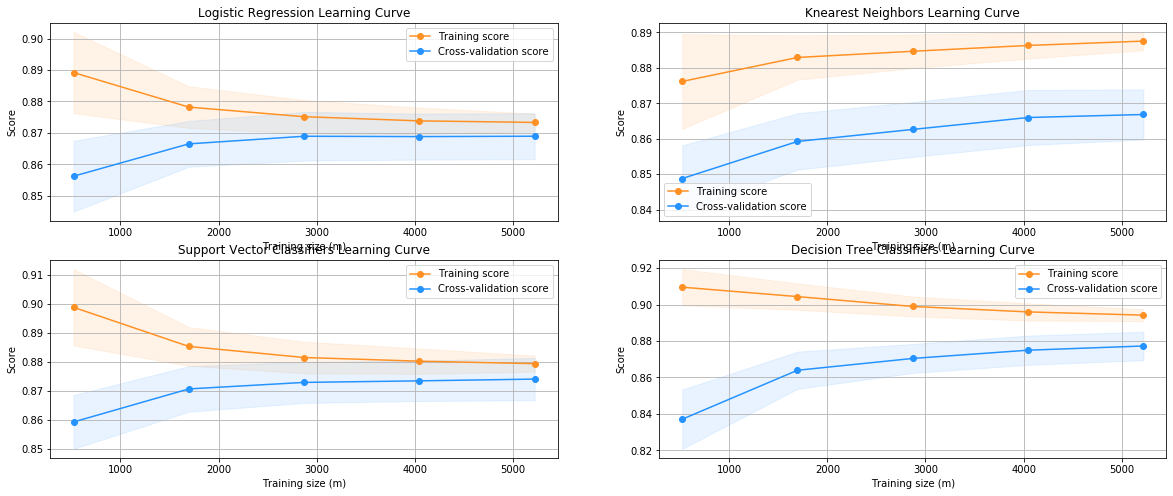

In [79]:
cv = ShuffleSplit(n_splits = 100, test_size = 0.25, random_state = 43)

plt.figure(figsize=[20,8])
plt.subplot(2,2,1)
plot_learning_curve(log_reg, X_train, y_train, cv = cv, n_jobs = -1)
plt.title("Logistic Regression Learning Curve")
plt.subplot(2,2,2)
plot_learning_curve(knears, X_train, y_train, cv = cv, n_jobs = -1)
plt.title("Knearest Neighbors Learning Curve")
plt.subplot(2,2,3)
plot_learning_curve(svc, X_train, y_train, cv = cv, n_jobs = -1)
plt.title("Support Vector Classifiers Learning Curve")
plt.subplot(2,2,4)
plot_learning_curve(tree, X_train, y_train, cv = cv, n_jobs = -1)
plt.title("Decision Tree Classifiers Learning Curve")

### Plotting ROC Curve

In [72]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv = 5)
knears_pred = cross_val_predict(knears,X_train, y_train, cv = 5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv = 5)
tree_pred = cross_val_predict(tree, X_train, y_train, cv = 5)

In [73]:
print("Logistic Regression : {}".format(roc_auc_score(y_train, log_reg_pred)))
print("K Nearest Neighbors : {}".format(roc_auc_score(y_train, knears_pred)))
print("Support Vector Classifier : {}".format(roc_auc_score(y_train, svc_pred)))
print("Decision Tree Classfifier : {}".format(roc_auc_score(y_train, tree_pred)))

Logistic Regression : 0.8718268426865394
K Nearest Neighbors : 0.8664931928202058
Support Vector Classifier : 0.8774040853400494
Decision Tree Classfifier : 0.880830073387488


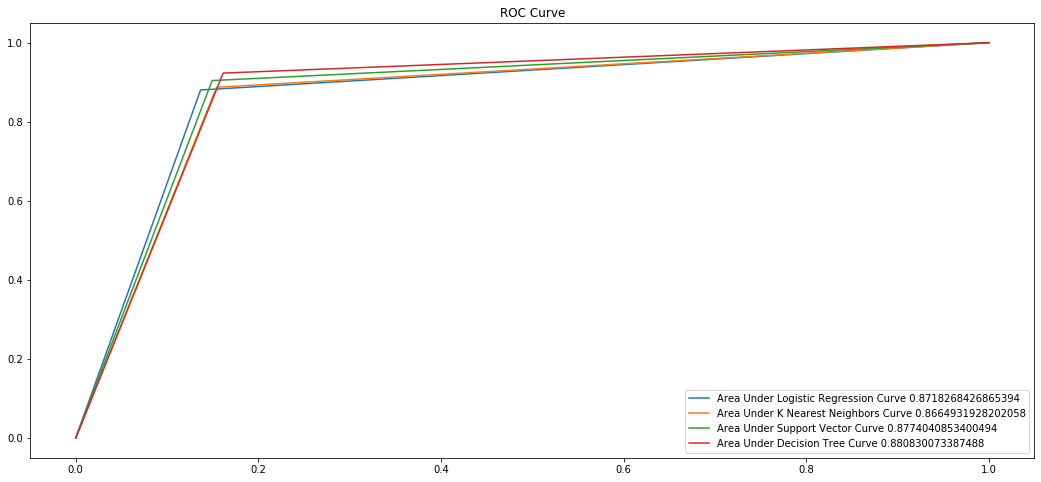

In [76]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train,log_reg_pred)
knears_fpr, knears_tpr, knears_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

plt.figure(figsize = [18,8])
plt.title("ROC Curve")
plt.plot(log_fpr, log_tpr, label = "Area Under Logistic Regression Curve {}".format(roc_auc_score(y_train, log_reg_pred)))
plt.plot(knears_fpr, knears_tpr, label = "Area Under K Nearest Neighbors Curve {}".format(roc_auc_score(y_train, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label = "Area Under Support Vector Curve {}".format(roc_auc_score(y_train, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label = "Area Under Decision Tree Curve {}".format(roc_auc_score(y_train, tree_pred)))
plt.legend()

### Predictions

In [81]:
y_pred_log = log_reg.predict(X_test)
y_pred_knears = knears.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree.predict(X_test)

### Confusion Matrix

In [82]:
log_reg_cm = confusion_matrix(y_test, y_pred_log)
knears_cm = confusion_matrix(y_test, y_pred_knears)
svc_cm = confusion_matrix(y_test, y_pred_svc)
tree_cm = confusion_matrix(y_test, y_pred_tree)

### Plotting Confusion Matrix

Text(0.5, 1, 'Decision Tree Confusion Matrix')

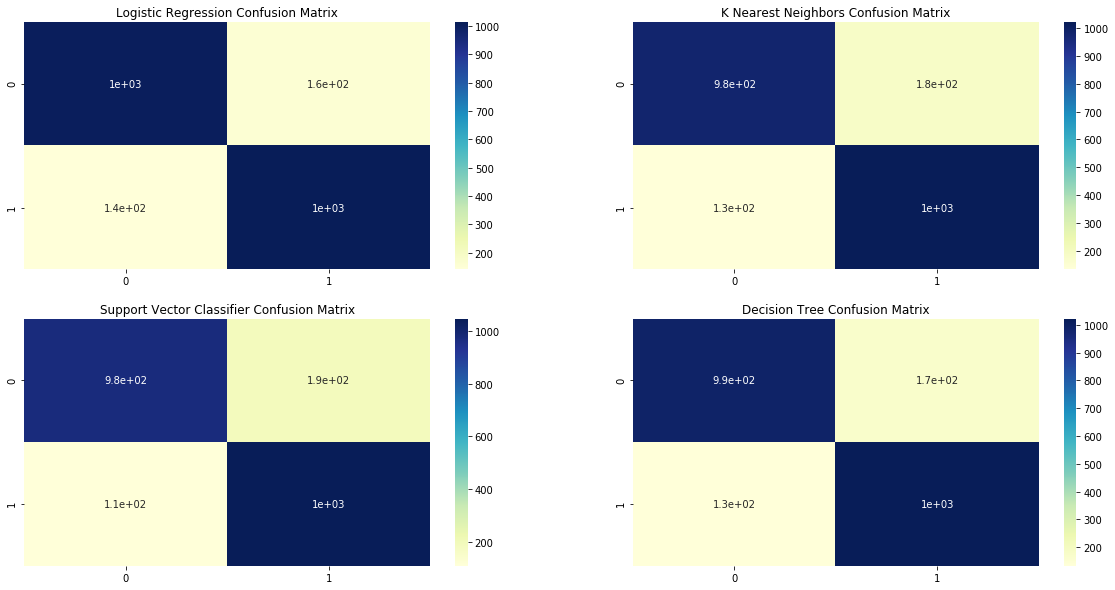

In [83]:
plt.figure(figsize = [20,10])
plt.subplot(2,2,1)
sns.heatmap(log_reg_cm, annot=True, cmap = 'YlGnBu')
plt.title("Logistic Regression Confusion Matrix")
plt.subplot(2,2,2)
sns.heatmap(knears_cm, annot=True, cmap = 'YlGnBu')
plt.title("K Nearest Neighbors Confusion Matrix")
plt.subplot(2,2,3)
sns.heatmap(svc_cm, annot=True, cmap = 'YlGnBu')
plt.title("Support Vector Classifier Confusion Matrix")
plt.subplot(2,2,4)
sns.heatmap(tree_cm, annot=True, cmap = 'YlGnBu')
plt.title("Decision Tree Confusion Matrix")

### Classification Report

In [86]:
print("Logistic Regression")
print(classification_report(y_test, y_pred_log))

print("K Nearest Neighbors")
print(classification_report(y_test, y_pred_knears))

print("Support Vector Classifiers")
print(classification_report(y_test, y_pred_svc))

print("Decision Tree Classifiers")
print(classification_report(y_test, y_pred_tree))

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1165
           1       0.86      0.88      0.87      1155

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighted avg       0.87      0.87      0.87      2320

K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1165
           1       0.85      0.88      0.86      1155

    accuracy                           0.86      2320
   macro avg       0.86      0.86      0.86      2320
weighted avg       0.86      0.86      0.86      2320

Support Vector Classifiers
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1165
           1       0.85      0.91      0.88      1155

    accuracy                           0.87      2320
   macro avg       0.87      0.87      0.87      2320
weighte